<a href="https://colab.research.google.com/github/yifengd/adversarial-nlp/blob/main/defenses/captum/catum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Based on: Explain Attacking BERT models using CAptum

Captum is a PyTorch library to explain neural networks
Here we show a minimal example using Captum to explain BERT models from TextAttack

[![Open Notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yifengd/adversarial-nlp/blob/main/defenses/captum/catum.ipynb)

[![Original Code on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/QData/TextAttack/blob/master/docs/2notebook/Example_5_Explain_BERT.ipynb)

In [1]:
!pip install textattack[tensorflow] tensorflow_text==2.10.0b2 captum nltk -q

     |████████████████████████████████| 415 kB 4.1 MB/s 
     |████████████████████████████████| 5.7 MB 27.1 MB/s 
     |████████████████████████████████| 1.4 MB 66.1 MB/s 
     |████████████████████████████████| 290 kB 64.2 MB/s 
     |████████████████████████████████| 3.6 MB 55.6 MB/s 
     |████████████████████████████████| 116 kB 78.0 MB/s 
     |████████████████████████████████| 401 kB 88.7 MB/s 
     |████████████████████████████████| 60 kB 7.1 MB/s 
     |████████████████████████████████| 41.4 MB 6.5 MB/s 
     |████████████████████████████████| 769 kB 73.3 MB/s 
     |████████████████████████████████| 4.7 MB 54.7 MB/s 
     |████████████████████████████████| 373 kB 93.8 MB/s 
     |████████████████████████████████| 69 kB 6.9 MB/s 
     |████████████████████████████████| 365 kB 96.3 MB/s 
     |████████████████████████████████| 361 kB 99.2 MB/s 
     |████████████████████████████████| 125 kB 97.8 MB/s 
     |████████████████████████████████| 596 kB 92.5 MB/s 
     |█████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from copy import deepcopy
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
# from textattack.datasets import HuggingFaceDataset
# from textattack.models.wrappers import HuggingFaceModelWrapper
# from textattack.models.wrappers import ModelWrapper
from transformers import AutoModelForSequenceClassification, AutoTokenizer

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:35<00:00, 13.4MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpc5sfgwfv.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Su

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else: 
    device = torch.device("cpu")
    
print(f"Using accelerator {device}")

Using accelerator cuda:0


## Configure Model and Dataset

In [59]:
# dataset = HuggingFaceDataset("ag_news", None, "train")
original_model = AutoModelForSequenceClassification.from_pretrained("textattack/bert-base-uncased-ag-news")
original_tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-ag-news")
model = HuggingFaceModelWrapper(original_model,original_tokenizer)

In [60]:
print(model.model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Perform TextAttack

In [ ]:
# import nltk
# nltk.download('omw-1.4')

In [ ]:
# from textattack.attack_recipes import PWWSRen2019
# attack = PWWSRen2019.build(model)

In [ ]:
# from textattack import Attacker
# from textattack import AttackArgs

# # attacker = Attacker(attack, dataset, attack_args=AttackArgs(num_successful_examples=100, parallel=True))
# # results = attacker.attack_dataset()

## Construct Dataframe of Original and Perturbed Samples

In [61]:
# adversarial_df = pd.DataFrame([{
#     "original_text": result.original_result.attacked_text.text,
#     "perturbed_text": result.perturbed_result.attacked_text.text,
#     "original_output": result.perturbed_result.ground_truth_output,
#     "perturbed_output": result.perturbed_result.output
#   }
#  for result in results])
# adversarial_df["result_type"] = np.where(adversarial_df["original_output"] == adversarial_df["perturbed_output"], "Failed", "Successful")
# adversarial_df = adversarial_df[adversarial_df["result_type"] == "Successful"]
# adversarial_df.to_csv("/content/pwws_attack.csv", index=False)

In [62]:
# adversarial_df = pd.read_csv("/content/pwws_attack.csv")
# adversarial_df = adversarial_df.head(-1)

In [63]:
DRIVE_PATH = '/content/drive/MyDrive/AdversarialXAI'
adversarial_df = pd.read_csv(f"{DRIVE_PATH}/Adversarial Samples/Older attacks/ag-news_pwws_bert.csv")
# adversarial_df = pd.read_csv(f"{DRIVE_PATH}/Adversarial Samples/sst2_train_pruthi_bert_NEW.csv")

In [64]:
def class_name_to_index(class_name):
  if class_name == "World":
    return 0
  elif class_name == "Sports":
    return 1
  elif class_name == "Business":
    return 2
  elif class_name == "Sci/tech":
    return 3
  else:
    raise ValueError(class_name)

adversarial_df['original_class'] = adversarial_df['original_class'].map(class_name_to_index)
adversarial_df['adversarial_class'] = adversarial_df['adversarial_class'].map(class_name_to_index)

In [65]:
adversarial_df

,Unnamed: 0,original_text,adversarial_text,original_class,original_confidence,adversarial_class,adversarial_confidence,attack,replace_dict,replace_num
0,0,Fed lifts rates a further quarter point By And...,course lifts grass a further quarter taper pas...,2,(100%),1,(78%),pwws,"{'Fed': 'course', 'rates': 'grass', 'point': '...",6
1,1,Indian-Americans hail Manmohan speech New York...,Indian-Americans come Manmohan delivery New Yo...,0,(100%),2,(62%),pwws,"{'hail': 'come', 'speech': 'delivery', 'meetin...",4
2,2,"Unisys to lay off 1,400 workers Unisys Corp. p...","Unisys to lay off 1,400 workers Unisys Corp. p...",3,(95%),2,(80%),pwws,{'cuts': 'skip'},1
3,3,Dollar Mired Near Lows Before Jobs Data LONDO...,Dollar involved Near Low earlier occupation Da...,2,(100%),0,(97%),pwws,"{'Mired': 'involved', 'Lows': 'Low', 'Before':...",13
4,4,"Keep quiet on U.S. election, Martin tells loos...","sustain calm on uracil.siemens. election, Mart...",0,(100%),1,(81%),pwws,"{'Keep': 'sustain', 'quiet': 'calm', 'U.S.': '...",13
...,...,...,...,...,...,...,...,...,...,...
419,419,EU draft draws fire in Turkey BRUSSELS: Turkey...,EEC potation haulage terminate in Turkey BRUSS...,0,(100%),2,(69%),pwws,"{'EU': 'EEC', 'draft': 'potation', 'draws': 'h...",4
420,420,U.S. Spies on Chat Rooms Could terrorists be p...,u.sec. espy on Chat Rooms Could terrorists be ...,3,(100%),2,(52%),pwws,"{'U.S.': 'U.sulphur.', 'Spies': 'espy'}",2
421,421,Stocks Climb on Drop in Consumer Prices NEW YO...,Stocks Climb on Drop in Consumer Prices Modern...,0,(100%),2,(96%),pwws,"{'NEW': 'Modern', 'Stocks': 'line', 'prices......",3
422,422,Sanpaolo and Dexia in merger talks By Reuters ...,Sanpaolo and Dexia in unification dialogue By ...,2,(100%),0,(99%),pwws,"{'merger': 'unification', 'talks': 'dialogue',...",6


In [66]:
# adversarial_df = adversarial_df.head(200)

In [67]:
model("Hello")

tensor([[-2.6552, -2.3094, -2.0204,  7.2200]])

## Calculate Attributions in Original and Perturbed Samples

In [143]:
from captum.attr import IntegratedGradients, LayerConductance, LayerIntegratedGradients, LayerDeepLiftShap, InternalInfluence, LayerGradientXActivation, LayerActivation
from captum.attr import visualization as viz

def calculate(input_ids,token_type_ids,attention_mask):
    #convert back to list of text
    return clone.model(input_ids,token_type_ids,attention_mask)[0]

clone = deepcopy(model)
clone.model.to(device)

for text_type in ["original", "adversarial"]:
  # lig = LayerActivation(calculate, clone.model.bert.embeddings)
  # lig = LayerIntegratedGradients(calculate, clone.model.bert.embeddings)
  # lig = InternalInfluence(calculate, clone.model.bert.embeddings)
  # lig = LayerGradientXActivation(calculate, clone.model.bert.embeddings)
  # lig = LayerDeepLiftShap(calculate, clone.model.bert.embeddings)
  # lig = IntegratedGradients(calculate, clone.model.bert.embeddings)
  # lig = LayerConductance(calculate, clone.model.bert.embeddings)

  tokens = model.tokenizer([sentence for sentence in adversarial_df[f"{text_type}_text"]], padding="max_length", max_length=128, return_tensors="pt").to(device)
  adversarial_df[f"{text_type}_tokens"] = [tokens[x].tokens for x in range(tokens.input_ids.shape[0])]

  # bsl = torch.zeros(tokens['input_ids'].size()).type(torch.LongTensor).to(device)
  labels = [i for i in adversarial_df[f"{text_type}_class"]]
  labels = torch.tensor(labels).to(device)
  batch_size = 100

  attributions = []

  for i in range(0, len(tokens['input_ids']), batch_size): # range((len(tokens['input_ids']) // batch_size) + 1):
    attributions_next = lig.attribute(inputs=tokens['input_ids'][i:i+batch_size],
                                  #baselines=bsl,
                                  additional_forward_args=(tokens['token_type_ids'][i:i+batch_size], tokens['attention_mask'][i:i+batch_size]),
                                  #n_steps = 10,
                                  target = labels[i:i+batch_size],
                                  # internal_batch_size=1
                                  )
    attributions.append(attributions_next)
    
  attributions = torch.cat(attributions)
  atts = attributions.sum(dim=-1).squeeze(0)
  # atts = atts / torch.norm(atts) # don't do this here, this will cause info leak!
  adversarial_df[f"{text_type}_attribution"] = (atts * tokens.attention_mask).cpu().detach().numpy().tolist()

RuntimeError: ignored

In [133]:
if 'lig' in locals():
  del lig


# del clone

# prints currently alive Tensors and Variables
import torch
import gc
gc.collect()

torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 2            |        cudaMalloc retries: 2         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    1003 MB |   15134 MB |   15636 GB |   15635 GB |
|       from large pool |     999 MB |   15126 MB |   15633 GB |   15632 GB |
|       from small pool |       3 MB |       8 MB |       2 GB |       2 GB |
|---------------------------------------------------------------------------|
| Active memory         |    1003 MB |   15134 MB |   15636 GB |   15635 GB |
|       from large pool |     999 MB |   15126 MB |   15633 GB |

## Inspect Attributions

In [134]:
adversarial_df

,Unnamed: 0,original_text,adversarial_text,original_class,original_confidence,adversarial_class,adversarial_confidence,attack,replace_dict,replace_num,original_tokens,original_attribution,adversarial_tokens,adversarial_attribution
0,0,Fed lifts rates a further quarter point By And...,course lifts grass a further quarter taper pas...,2,(100%),1,(78%),pwws,"{'Fed': 'course', 'rates': 'grass', 'point': '...",6,"[[CLS], fed, lifts, rates, a, further, quarter...","[0.7300204634666443, 0.021871156990528107, 0.4...","[[CLS], course, lifts, grass, a, further, quar...","[0.16636627912521362, -0.003206588327884674, 0..."
1,1,Indian-Americans hail Manmohan speech New York...,Indian-Americans come Manmohan delivery New Yo...,0,(100%),2,(62%),pwws,"{'hail': 'come', 'speech': 'delivery', 'meetin...",4,"[[CLS], indian, -, americans, hail, man, ##mo,...","[-0.5724058747291565, -0.13971687853336334, -1...","[[CLS], indian, -, americans, come, man, ##mo,...","[0.25712645053863525, 0.08944525569677353, 0.5..."
2,2,"Unisys to lay off 1,400 workers Unisys Corp. p...","Unisys to lay off 1,400 workers Unisys Corp. p...",3,(95%),2,(80%),pwws,{'cuts': 'skip'},1,"[[CLS], un, ##is, ##ys, to, lay, off, 1, ,, 40...","[-0.4660606384277344, -0.16436432301998138, -0...","[[CLS], un, ##is, ##ys, to, lay, off, 1, ,, 40...","[0.4682859182357788, 0.140626460313797, 0.2815..."
3,3,Dollar Mired Near Lows Before Jobs Data LONDO...,Dollar involved Near Low earlier occupation Da...,2,(100%),0,(97%),pwws,"{'Mired': 'involved', 'Lows': 'Low', 'Before':...",13,"[[CLS], dollar, mir, ##ed, near, low, ##s, bef...","[0.2999020516872406, 0.1547422558069229, 0.016...","[[CLS], dollar, involved, near, low, earlier, ...","[0.35953283309936523, 0.22178155183792114, 0.4..."
4,4,"Keep quiet on U.S. election, Martin tells loos...","sustain calm on uracil.siemens. election, Mart...",0,(100%),1,(81%),pwws,"{'Keep': 'sustain', 'quiet': 'calm', 'U.S.': '...",13,"[[CLS], keep, quiet, on, u, ., s, ., election,...","[-0.03747919201850891, 0.03273528814315796, 0....","[[CLS], sustain, calm, on, ur, ##ac, ##il, ., ...","[-0.5416815280914307, 0.17703069746494293, 0.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,419,EU draft draws fire in Turkey BRUSSELS: Turkey...,EEC potation haulage terminate in Turkey BRUSS...,0,(100%),2,(69%),pwws,"{'EU': 'EEC', 'draft': 'potation', 'draws': 'h...",4,"[[CLS], eu, draft, draws, fire, in, turkey, br...","[-0.20264111459255219, -0.0048521533608436584,...","[[CLS], ee, ##c, pot, ##ation, haul, ##age, te...","[0.331927090883255, 0.15159857273101807, 0.075..."
420,420,U.S. Spies on Chat Rooms Could terrorists be p...,u.sec. espy on Chat Rooms Could terrorists be ...,3,(100%),2,(52%),pwws,"{'U.S.': 'U.sulphur.', 'Spies': 'espy'}",2,"[[CLS], u, ., s, ., spies, on, chat, rooms, co...","[-0.04666028544306755, -0.03127229958772659, -...","[[CLS], u, ., sec, ., es, ##py, on, chat, room...","[0.09109655767679214, 0.07300369441509247, 0.3..."
421,421,Stocks Climb on Drop in Consumer Prices NEW YO...,Stocks Climb on Drop in Consumer Prices Modern...,0,(100%),2,(96%),pwws,"{'NEW': 'Modern', 'Stocks': 'line', 'prices......",3,"[[CLS], stocks, climb, on, drop, in, consumer,...","[-0.119974285364151, 0.22779779136180878, 0.15...","[[CLS], stocks, climb, on, drop, in, consumer,...","[0.21694089472293854, -0.1393570899963379, -0...."
422,422,Sanpaolo and Dexia in merger talks By Reuters ...,Sanpaolo and Dexia in unification dialogue By ...,2,(100%),0,(99%),pwws,"{'merger': 'unification', 'talks': 'dialogue',...",6,"[[CLS], san, ##pa, ##olo, and, dex, ##ia, in, ...","[0.19803304970264435, 0.3225097954273224, 0.01...","[[CLS], san, ##pa, ##olo, and, dex, ##ia, in, ...","[0.24814948439598083, 0.1934664249420166, 0.15..."


## Plot Attributions of Original and Perturbed Samples

0      55
1      54
2      61
3      59
4      58
       ..
419    49
420    56
421    77
422    75
423    27
Name: original_attribution, Length: 424, dtype: int64
0      56
1      54
2      61
3      58
4      61
       ..
419    52
420    59
421    77
422    78
423    35
Name: adversarial_attribution, Length: 424, dtype: int64


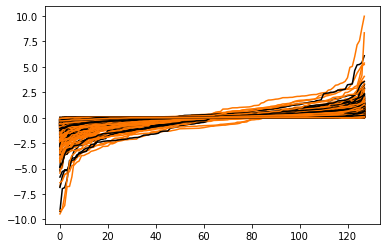

In [135]:
num_rows, _ = adversarial_df.shape
fig, ax = plt.subplots()
for i in range(num_rows):
  ax.plot(np.sort(adversarial_df.iloc[i].original_attribution), color="black")
  ax.plot(np.sort(adversarial_df.iloc[i].adversarial_attribution), color="#FF7700")

lens = adversarial_df['original_attribution'].apply(lambda x: len(np.array(x)[np.array(x) != 0]))
print(lens)
lens = adversarial_df['adversarial_attribution'].apply(lambda x: len(np.array(x)[np.array(x) != 0]))
print(lens)

# num_rows, _ = adversarial_df.shape
# fig, axs = plt.subplots(num_rows, 1, figsize=(10, num_rows*5))

# for i in range(num_rows):
#   axs[i].plot(np.sort(adversarial_df.iloc[i].original_attribution), color="black")
#   axs[i].plot(np.sort(adversarial_df.iloc[i].perturbed_attribution), color="#FF7700")
#   axs[i].set_title(f"{adversarial_df.iloc[i].original_text}\n{adversarial_df.iloc[i].perturbed_text}")

## Preprocess the Dataframe

In [136]:
max_tokens_original = adversarial_df["original_attribution"].apply(lambda x: len(x)).max()
max_tokens_perturbed = adversarial_df["adversarial_attribution"].apply(lambda x: len(x)).max()

In [137]:
# X_original = adversarial_df["original_attribution"].apply(lambda x: np.array(x)).to_numpy()
# X_perturbed = adversarial_df["perturbed_attribution"].apply(lambda x: np.array(x)).to_numpy()

# Y_original = np.zeros(X_original.shape[0])
# Y_perturbed = np.ones(X_perturbed.shape[0])

# X = np.concatenate((X_original, X_perturbed))
# Y = np.concatenate((Y_original, Y_perturbed))

# # Fix the padding to alywas match n
# max_tokens = max(max_tokens_original, max_tokens_perturbed)
# X = [np.pad(x, (0, max_tokens-x.shape[0])) for x in X]

# # Convert array of arrays to 2D-array
# X = np.stack(X)

# X, Y = sklearn.utils.shuffle(X, Y, random_state=42)

In [138]:
def pad_from_middle(x, num_pad):
  out = np.zeros(x.shape[0] + num_pad)
  middle = int(x.shape[0] / 2)
  out[:middle] = x[:middle]
  out[middle + num_pad:] = x[middle:]
  out[middle:middle + num_pad] = 0
  return out

def make_samples(df):
  X_original = df["original_attribution"].apply(lambda x: np.array(x)).to_numpy()
  X_perturbed = df["adversarial_attribution"].apply(lambda x: np.array(x)).to_numpy()

  Y_original = np.zeros(X_original.shape[0])
  Y_perturbed = np.ones(X_perturbed.shape[0])

  X = np.concatenate((X_original, X_perturbed))
  Y = np.concatenate((Y_original, Y_perturbed))

  Y = Y.astype(int)

  # Fix the padding to alywas match n
  max_tokens = max(max_tokens_original, max_tokens_perturbed)
  # X = [np.pad(x, (0, max_tokens-x.shape[0])) for x in X]
  # X = [pad_from_middle(x, max_tokens - x.shape[0]) for x in X]

  # Convert array of arrays to 2D-array
  X = np.stack(X)

  X = np.sort(X, axis=1)

  # X = X / np.linalg.norm(X)

  X, Y = sklearn.utils.shuffle(X, Y, random_state=42)
  return X, Y

In [139]:
shuffled_df = adversarial_df.sample(frac=1)
train_df = shuffled_df.iloc[:int(len(shuffled_df) * 0.7)]
test_df = shuffled_df.iloc[int(len(shuffled_df) * 0.7):]

## Train an Adversarial Detector

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       296
           1       0.78      0.74      0.76       296

    accuracy                           0.76       592
   macro avg       0.76      0.76      0.76       592
weighted avg       0.76      0.76      0.76       592

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       128
           1       0.58      0.57      0.57       128

    accuracy                           0.58       256
   macro avg       0.58      0.58      0.58       256
weighted avg       0.58      0.58      0.58       256



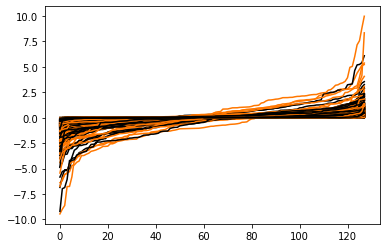

<Figure size 1440x1440 with 0 Axes>

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

x_train, y_train = make_samples(train_df)
x_test, y_test = make_samples(test_df)

# x_train = x_train[:, 1:]
# x_test = x_test[:, 1:]

num_rows = len(x_train)
fig, ax = plt.subplots()
for i in range(num_rows):
  if y_train[i] == 0:
    ax.plot(x_train[i], color="black")
  else:
    ax.plot(x_train[i], color="#FF7700")

# cls = sklearn.naive_bayes.GaussianNB()
cls = RandomForestClassifier(max_depth=4)
# cls = DecisionTreeClassifier()
cls.fit(x_train, y_train)

plt.figure(figsize=(20,20))
# sklearn.tree.plot_tree(cls, class_names=True, filled=True)
preds = cls.predict(x_test)
# draw_confusion_matrix(y_test, preds, "Gaussian Naive Bayes")

print(sklearn.metrics.classification_report(y_train, cls.predict(x_train)))
print(sklearn.metrics.classification_report(y_test, preds))

# print(x_train[y_train == 0, 1])

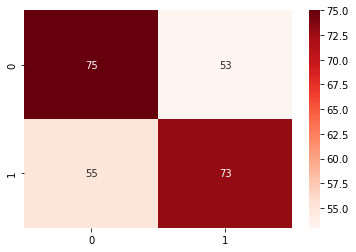

In [141]:
import seaborn as sns

sns.heatmap(sklearn.metrics.confusion_matrix(y_test, preds), annot=True, cmap="Reds")